# 22. Standard AutoEncoder

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random
import os

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## Load MNIST Data

In [3]:
mnist_train = dsets.MNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [4]:
batch_size = 100

train_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                           batch_size=batch_size,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(dataset=mnist_test,
                                          batch_size=1,
                                          shuffle=False)

In [5]:
def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

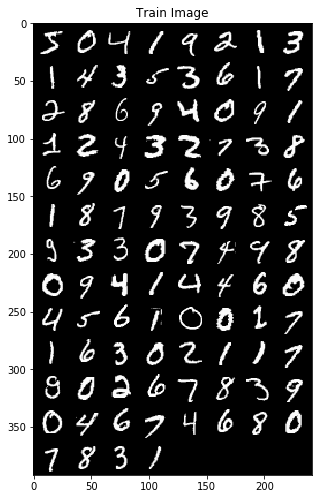

In [6]:
images, labels = iter(train_loader).next()
imshow(utils.make_grid(images, normalize=True), "Train Image")

## Define Model

In [7]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
#         self.encoder = nn.Linear(28*28, 28)
#         self.decoder = nn.Linear(28, 28*28)

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 400),
            nn.Linear(400, 28)
        )
        self.decoder = nn.Sequential(
            nn.Linear(28, 400),
            nn.Linear(400, 28*28)
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        z = self.encoder(x)
        out = self.decoder(z)
        out = out.view(-1, 28*28)
        
        return out
    
model = AutoEncoder().cuda()

## Training

In [8]:
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
num_epochs = 20

for epoch in range(num_epochs):
    
    total_batch = len(mnist_train) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28).cuda() # flatten
        
        pred = model(X)
        cost = loss(pred, X)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) == total_batch:
            print('Epoch [%d/%d], lter [%d/%d] Loss: %.4f'%(epoch+1, num_epochs, i+1, total_batch, cost.item()))

print("Learning Finished!")

Epoch [1/20], lter [600/600] Loss: 0.0243
Epoch [2/20], lter [600/600] Loss: 0.0237
Epoch [3/20], lter [600/600] Loss: 0.0231
Epoch [4/20], lter [600/600] Loss: 0.0229
Epoch [5/20], lter [600/600] Loss: 0.0228
Epoch [6/20], lter [600/600] Loss: 0.0231
Epoch [7/20], lter [600/600] Loss: 0.0231
Epoch [8/20], lter [600/600] Loss: 0.0225
Epoch [9/20], lter [600/600] Loss: 0.0227
Epoch [10/20], lter [600/600] Loss: 0.0223
Epoch [11/20], lter [600/600] Loss: 0.0224
Epoch [12/20], lter [600/600] Loss: 0.0225
Epoch [13/20], lter [600/600] Loss: 0.0223
Epoch [14/20], lter [600/600] Loss: 0.0223
Epoch [15/20], lter [600/600] Loss: 0.0221
Epoch [16/20], lter [600/600] Loss: 0.0228
Epoch [17/20], lter [600/600] Loss: 0.0220
Epoch [18/20], lter [600/600] Loss: 0.0220
Epoch [19/20], lter [600/600] Loss: 0.0222
Epoch [20/20], lter [600/600] Loss: 0.0221
Learning Finished!


## Test

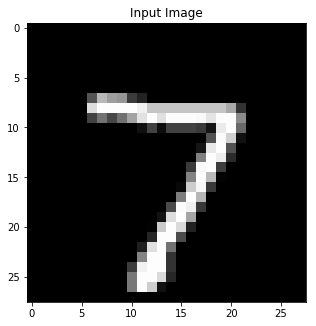

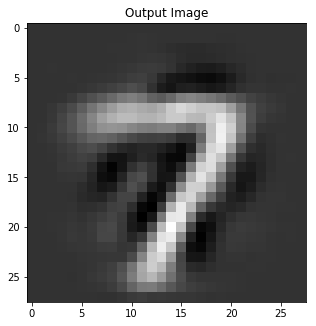

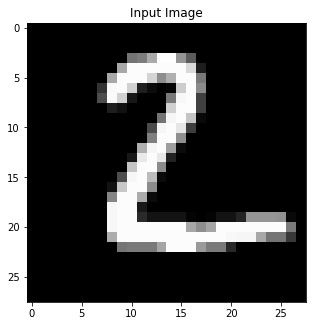

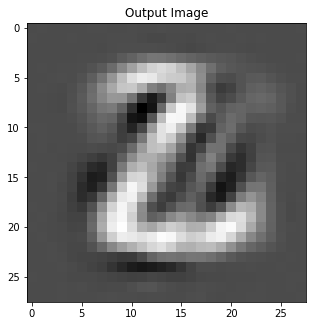

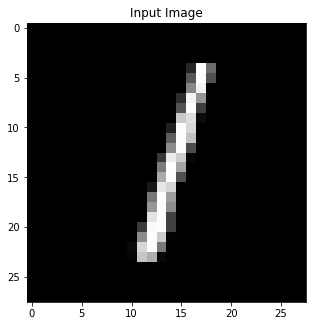

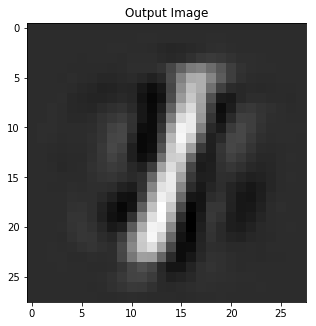

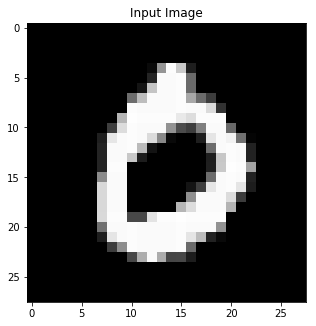

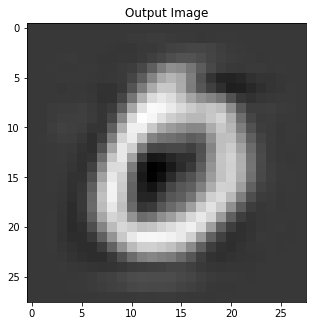

In [10]:
model.eval()

for n, (images, labels) in enumerate(mnist_test):
    
    imshow(torchvision.utils.make_grid(images, normalize=True), "Input Image")
    images  = images.view(-1, 28 * 28).cuda()
    
    outputs = model(images)
    outputs = outputs.view(-1, 28, 28)
    
    imshow(torchvision.utils.make_grid(outputs.data.cpu(), normalize=True), "Output Image")
    
    if n > 2 : break